In [1]:
import pandas as pd
import numpy as np
import nsepy
from nsepy import get_history as web
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from nsepy.derivatives import get_expiry_date

In [2]:
mo = pd.read_csv('monday_ce_close.csv')
mo.set_index('Unnamed: 0',inplace=True)
mo.index = pd.to_datetime(mo.index)

In [3]:
tuo=pd.read_csv('tuesday_ce_open.csv')
tuo.set_index('Unnamed: 0', inplace = True)
tuo.index = pd.to_datetime(tuo.index)

tuo.index = tuo.index - timedelta(days=1)
tupre = tuo[['Open(+1000)','Open(+1050)','Open(+1100)','Open(+1150)','Open(+1200)','Open(+1250)','Open(+1300)','Open(+1350)','Open(+1400)','Open(+1450)','High(+1450)']]
tupre.rename(columns = {'Open(+1000)':'tu1000_open','Open(+1050)':'tu1050_open','Open(+1100)':'tu1100_open','Open(+1150)':'tu1150_open','Open(+1200)':'tu1200_open','Open(+1250)':'tu1250_open','Open(+1300)':'tu1300_open','Open(+1350)':'tu1350_open','Open(+1400)':'tu1400_open','Open(+1450)':'tu1450_open','High(+1450)':'Predicted_high1450'}, inplace = True)

C:\Users\Vikas Kumar\AppData\Local\Temp\ipykernel_55208\3847247633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tupre.rename(columns = {'Open(+1000)':'tu1000_open','Open(+1050)':'tu1050_open','Open(+1100)':'tu1100_open','Open(+1150)':'tu1150_open','Open(+1200)':'tu1200_open','Open(+1250)':'tu1250_open','Open(+1300)':'tu1300_open','Open(+1350)':'tu1350_open','Open(+1400)':'tu1400_open','Open(+1450)':'tu1450_open','High(+1450)':'Predicted_high1450'}, inplace = True)


In [4]:
nf = pd.read_csv('nifty.csv')
nf.set_index('Date',inplace=True)
nf.index = pd.to_datetime(nf.index)

In [5]:
nfmon = nf[nf['day_of_week']=='Monday']
nfmon_close = nfmon[['Close']]
nfmon_close.rename(columns = {'Close':'Nifty_Monday_close'},inplace=True)

C:\Users\Vikas Kumar\AppData\Local\Temp\ipykernel_55208\2877145857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfmon_close.rename(columns = {'Close':'Nifty_Monday_close'},inplace=True)


In [6]:
nftu= nf[nf['day_of_week']=='Tuesday']
nftu_open = nftu[['Open']]
nftu_open.rename(columns={'Open':'Nifty_Tuesday_open'},inplace=True)
nftu_open.index = nftu_open.index - timedelta(days = 1)

C:\Users\Vikas Kumar\AppData\Local\Temp\ipykernel_55208\1010646729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nftu_open.rename(columns={'Open':'Nifty_Tuesday_open'},inplace=True)


In [7]:
for_tu = pd.concat([mo,nfmon_close,nftu_open,tupre],axis = 1)
for_tu = for_tu.dropna()

In [8]:
for_tu

,Open(+1000),High(+1000),Low(+1000),Close(+1000),Change in OI(+1000),Open(+1050),High(+1050),Low(+1050),Close(+1050),Change in OI(+1050),...,tu1050_open,tu1100_open,tu1150_open,tu1200_open,tu1250_open,tu1300_open,tu1350_open,tu1400_open,tu1450_open,Predicted_high1450
2022-01-03,1.15,1.15,0.45,0.60,49550.0,0.75,1.15,0.55,0.70,33000.0,...,0.65,0.90,0.70,0.50,0.70,0.50,0.95,0.65,0.80,0.90
2022-01-10,1.15,1.30,0.70,0.95,838350.0,1.30,1.30,0.60,0.75,650.0,...,0.75,0.80,0.60,1.00,0.65,0.70,0.75,0.40,0.65,0.85
2022-01-17,1.50,1.50,0.85,1.00,44450.0,1.25,1.50,0.80,0.95,8650.0,...,1.10,0.95,0.85,0.95,0.90,0.85,0.80,0.20,0.95,1.30
2022-01-24,9.80,9.80,3.80,4.85,-411600.0,7.80,7.80,3.55,4.60,488550.0,...,4.30,4.75,3.80,4.00,3.70,2.00,3.25,3.25,3.90,3.90
2022-01-31,9.80,13.35,6.60,10.85,239750.0,7.10,11.85,5.45,9.10,350450.0,...,5.25,6.30,4.00,5.05,3.90,0.75,3.25,3.00,4.00,5.50
2022-02-07,3.60,4.00,2.60,3.10,1339550.0,3.45,3.45,2.30,2.90,-141150.0,...,2.50,2.50,2.00,2.00,1.70,2.25,2.00,1.80,2.25,2.25
2022-02-14,9.00,9.00,3.35,3.85,2308800.0,6.20,6.20,2.95,3.40,606000.0,...,2.90,2.40,2.50,3.00,2.20,2.65,1.75,1.90,1.60,1.90
2022-02-21,2.35,2.45,1.05,1.60,-454450.0,2.30,2.30,1.40,1.60,-220400.0,...,2.00,2.55,2.50,2.00,1.90,1.75,1.45,1.50,1.35,1.90
2022-03-07,10.10,24.70,8.10,9.70,354400.0,23.50,23.50,6.95,8.25,889800.0,...,8.80,6.90,6.00,4.90,4.70,3.90,3.70,3.95,2.90,3.25
2022-03-14,2.15,2.75,0.90,2.15,155750.0,1.75,2.10,1.35,1.80,642400.0,...,1.60,1.10,0.80,0.85,1.10,0.90,1.05,0.90,0.75,1.00


In [9]:
X= for_tu.drop('Predicted_high1450',axis=1)
Y=for_tu['Predicted_high1450']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3,random_state=27, shuffle=True)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_)

0.5560753005615187


In [11]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Open(+1000),1.609117e-01
High(+1000),3.208226e-02
Low(+1000),8.823148e-03
Close(+1000),4.588613e-02
Change in OI(+1000),3.057440e-08
...,...
tu1250_open,9.376804e-03
tu1300_open,-8.424919e-02
tu1350_open,5.363943e-02
tu1400_open,-1.252749e-01


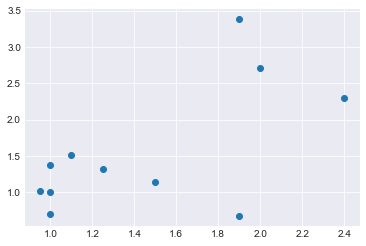

In [12]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

In [13]:
df = pd.DataFrame()
df['Actuals'] = y_test
df['Pred'] = predictions
df

,Actuals,Pred
2022-03-14,1.00,1.371097
2022-06-06,1.00,0.706644
2022-12-05,1.25,1.317790
2022-08-29,1.10,1.520242
2022-10-03,1.50,1.139047
2022-08-22,2.40,2.303030
2022-10-17,0.95,1.015190
2022-04-18,2.00,2.712749
2022-02-21,1.90,0.670601
2022-02-14,1.90,3.388563


In [14]:
df['MAPE'] = abs((df.Pred - df.Actuals) / df.Actuals) * 100
df['Accuracy'] = 100 - df.MAPE
df

,Actuals,Pred,MAPE,Accuracy
2022-03-14,1.00,1.371097,37.109655,62.890345
2022-06-06,1.00,0.706644,29.335605,70.664395
2022-12-05,1.25,1.317790,5.423213,94.576787
2022-08-29,1.10,1.520242,38.203777,61.796223
2022-10-03,1.50,1.139047,24.063546,75.936454
2022-08-22,2.40,2.303030,4.040405,95.959595
2022-10-17,0.95,1.015190,6.862079,93.137921
2022-04-18,2.00,2.712749,35.637451,64.362549
2022-02-21,1.90,0.670601,64.705233,35.294767
2022-02-14,1.90,3.388563,78.345440,21.654560


In [15]:
df.Accuracy.mean()

70.5199547735752